Importing Libraries

In [5]:
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Common Variables

In [6]:
#---------- Path of the Training dataset -----------------#
TRANING_DATASET = "C:/Users/venky/OneDrive/Desktop/NN/Assignment 1/Nums/Train/"

#----------- Path of the Noisy dataset -------------------#
NOISY_DATASET = "C:/Users/venky/OneDrive/Desktop/NN/Assignment 1/Nums/Noisy/"

#---------- Required Standard Deviations -----------------#
STANDARD_DEVIATIONS = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]

Common Functions

In [7]:
# Function to convert an image to numpy array
import matplotlib.pyplot as plt

def imagetensor(imagedir):
  '''
    imagedir: The directory/path of the images to be converted to NumPy Array

  '''
  temp=[]
  for image  in os.listdir(imagedir):
    im= Image.open(imagedir+image)
    im=im.convert('L')
    temp.append(np.array(im))
  
  images=np.array(temp)
  images=np.where(images<np.mean(images),0,1).astype('float64')
  return images

# Function to convert NumPy Array to 0s and 1s based on the thresold value
def convert_array_to_0_and_1(array):
  return np.where(array<np.mean(array),0,1).astype('float64')

# Function to display the results of the predicted images
def display(oi,pi,single_line=False):
  '''
    oi: Original Image data
    pi: Predicted Image data
  
  '''
  for i in range(oi.shape[0]):
    fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)
    plt.subplots_adjust(top=1)
    axis[0].set_title('Original Image')
    axis[1].set_title('Predicted Image')
    axis[0].imshow(oi[i].reshape(16,16),cmap="gray",)
    axis[1].imshow(pi[i].reshape(16,16),cmap="gray")


def plot_data(all_metrics, noiseless=False, smm=False):
    fig,ax = plt.subplots()

    ax.set_ylabel("Fh and Ffa")
    if not noiseless:
      ax.set_title("Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron") if not smm else ax.set_title("Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Shallow Multi-layer Neural Network")
      ax.set_xlabel("Gaussian Noise Level (stdev, at 10 pct xsecn)")
      ax.set_xlim(0.0009, 0.12)
      ax.set_ylim(0,1.05)
      ax.set_xscale("log")
      ax.set_xticks(STANDARD_DEVIATIONS)
      ax.set_xticklabels(STANDARD_DEVIATIONS)

      for i in range(10):
        for j in STANDARD_DEVIATIONS:
            ax.plot(j, all_metrics[j][i][0], 'o', color='black')
            ax.plot(j, all_metrics[j][i][1], 'o', color='black', markerfacecolor='none')
    else:
      ax.set_title("Graph of Fh and Ffa vs. Noiseless Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron")
      ax.set_xticks([0])
      ax.set_xticklabels(["Noiseless Data"])
      for i in range(10):
            ax.plot(0, all_metrics[i][0], 'o', color='black')
            ax.plot(0, all_metrics[i][1], 'o', color='black', markerfacecolor='none')


    plt.show()

In [8]:
#---------- Importing the training dataset -----------------#
model_train = imagetensor(TRANING_DATASET)

#---------- Flatenning the array to feed it as input nodes to the model -----------------#
model_train = model_train.reshape(model_train.shape[0],1,256)
print(model_train.shape,model_train.dtype)

(10, 1, 256) float64


In [9]:
#---------- Creating the model -----------------#
#---------- Using Sigmoid as Activation Function -----------------#
#---------- Configuring the model with 256 Input and Output nodes -----------------#
model = keras.Sequential([
    keras.layers.Dense(256,activation=tf.nn.sigmoid,input_shape=(1,256)),
])

#------- Using Mean Squared Error as the loss function --------------#
model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss='mean_squared_error')

print('Model Summary')
model.summary()

#------- Printing all the details of thge Model --------------#
print('Shapes & Bias')
for layer in model.layers:
    print(layer.name)
    print('Weights shape: ',layer.get_weights()[0].shape)
    print('Bias Shape: ',layer.get_weights()[1].shape)

#------- Training the model --------------#
model.fit(model_train,model_train,epochs=4000)

Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 256)            65792     
Total params: 65,792
Trainable params: 65,792
Non-trainable params: 0
_________________________________________________________________
Shapes & Bias
dense
Weights shape:  (256, 256)
Bias Shape:  (256,)
Epoch 1/4000
1/1 [==============================] - 0s 342ms/step - loss: 0.3005
Epoch 2/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 3/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.2134
Epoch 4/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.1770
Epoch 5/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.1456
Epoch 6/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.1193
Epoch 7/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.0978
Epoch 8/40

(10, 1, 256) (10, 1, 256)


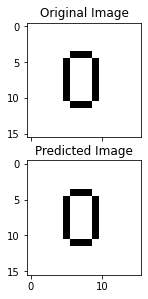

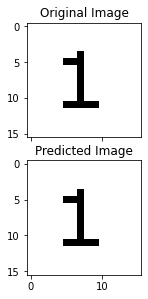

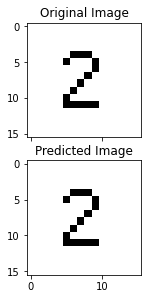

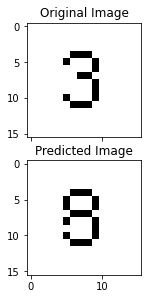

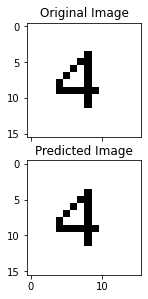

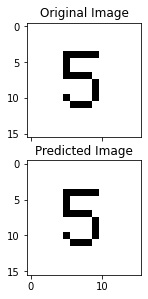

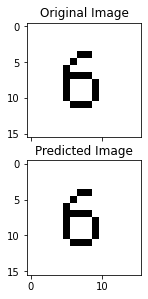

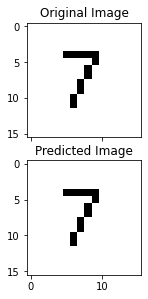

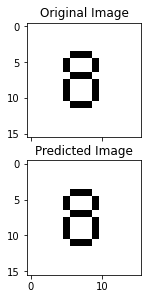

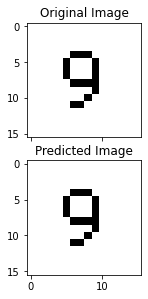

In [10]:
#------- Predicting the dataset with the trained model --------------#
original_data_predict = model.predict(model_train)

model_train = convert_array_to_0_and_1(model_train)
original_data_predict = convert_array_to_0_and_1(original_data_predict)

print(model_train.shape,original_data_predict.shape)

#------- Displaying the results of the predictions --------------#
display(model_train,original_data_predict)

Adding Noise to Images

In [11]:
#------- Function to generate Gaussian Noise at 25 random pixels in the Image --------------#
def noisy(images):
    '''
        images: list of images to add noise to
    '''
    for std in STANDARD_DEVIATIONS:
        for image_name, image in enumerate(images):
            row,col= image.shape
            noise_pixels=np.ones([16,16],dtype='float64')
            mean = 0

            #------- Generating gaussian noise with required standard deviation --------------#        
            gauss = np.random.normal(mean,std**0.5,(row,col))
            for _ in range(25):
                x=np.random.choice(16)
                y=np.random.choice(16)
                noise_pixels[x][y]=gauss[x][y]
            
            #------- Adding the generated noise to the image --------------#
            noisy = image + noise_pixels
            noisy = convert_array_to_0_and_1(noisy)

            #------- Saving the Noisy Image to Noisy Folder --------------#
            plt.imsave(f"{NOISY_DATASET}{std}/{image_name}.jpg",noisy,cmap='gray')
    return noisy


#------- Adding noise to dataset --------------#
noisy(imagetensor(TRANING_DATASET))

array([[1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

Predicting Noise Added Images over Original Images

Predictions for Noisy data with Standard Deviation


C:\Users\venky\AppData\Local\Temp\ipykernel_13332\2965780633.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)


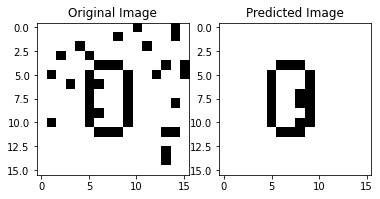

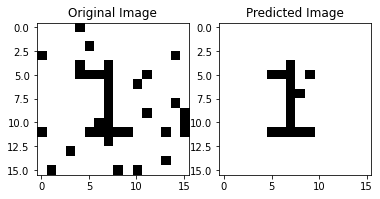

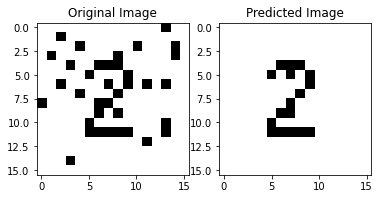

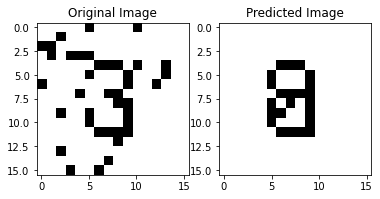

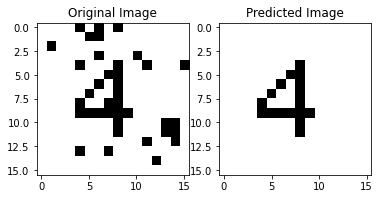

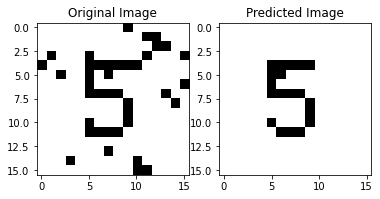

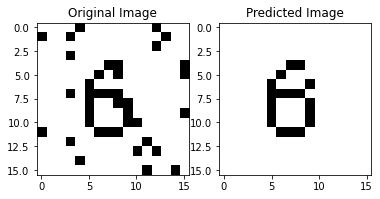

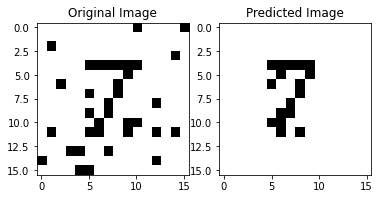

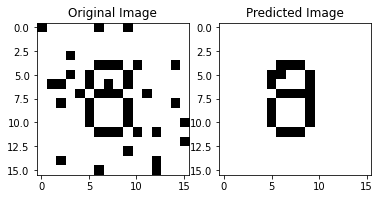

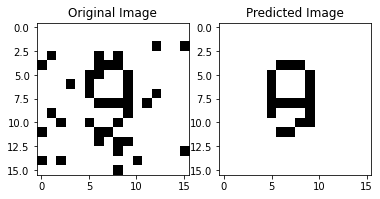

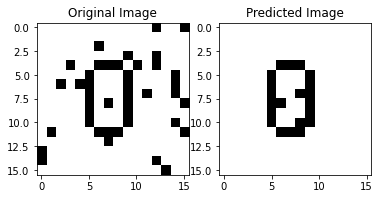

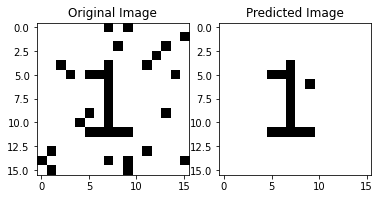

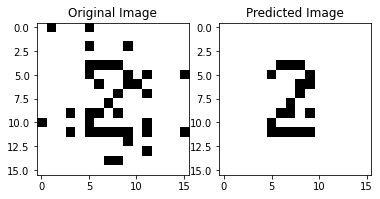

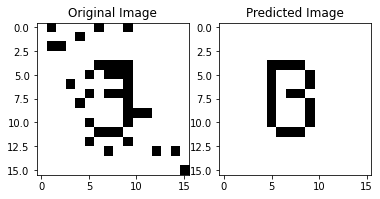

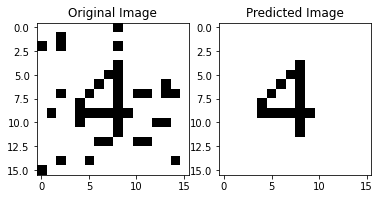

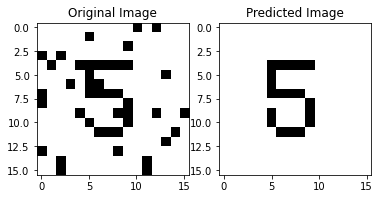

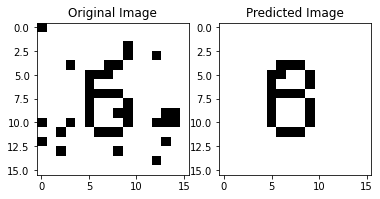

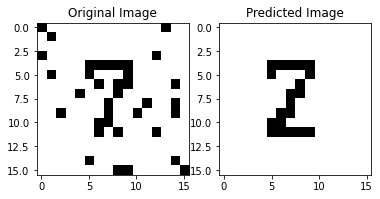

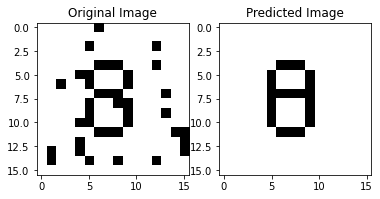

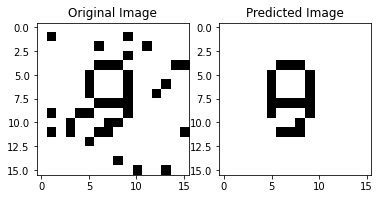

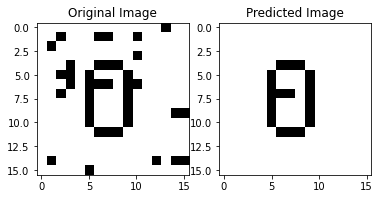

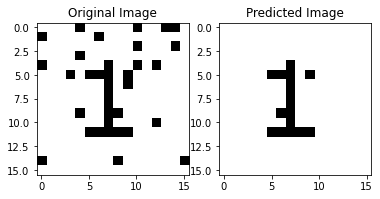

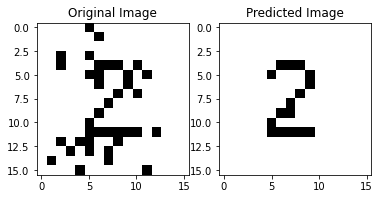

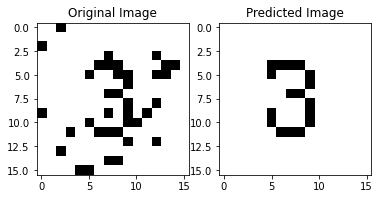

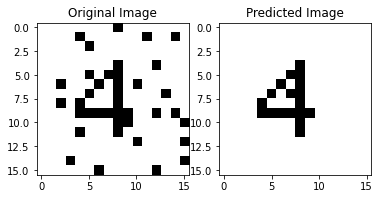

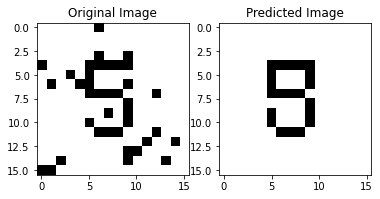

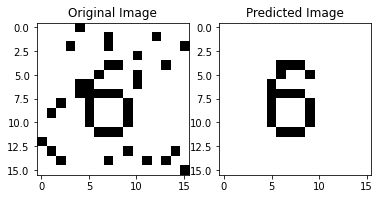

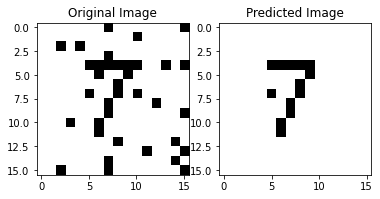

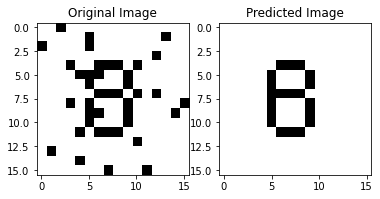

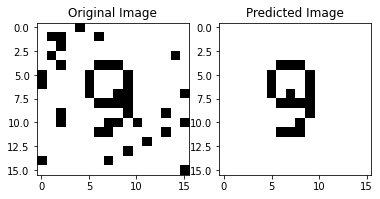

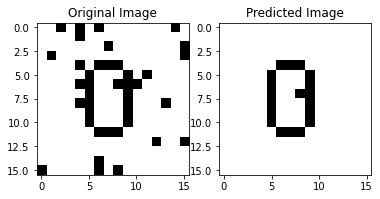

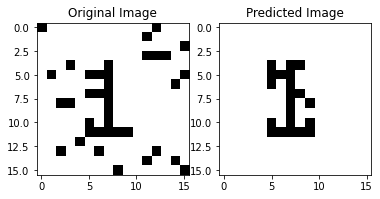

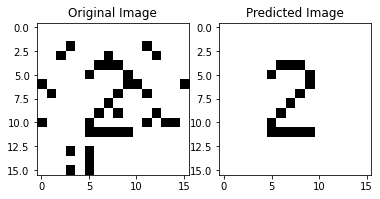

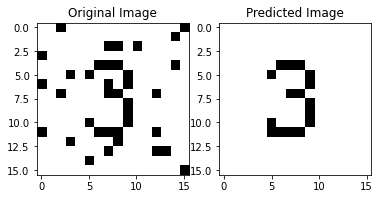

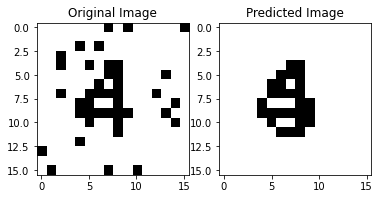

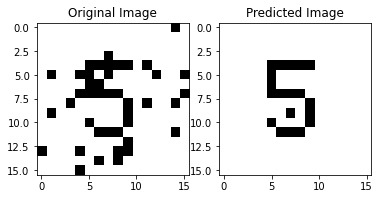

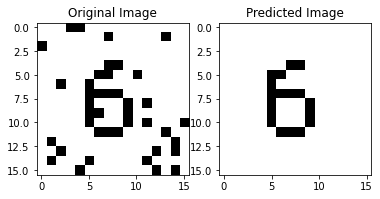

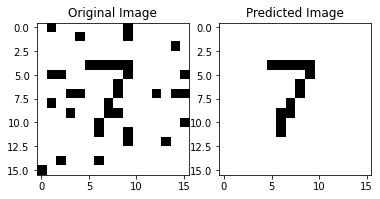

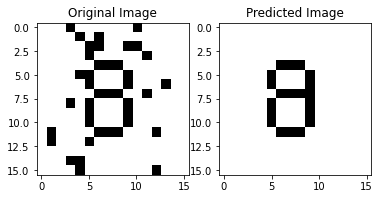

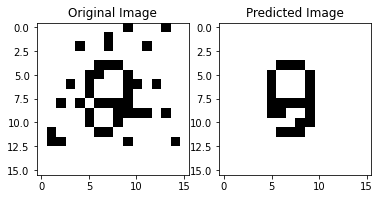

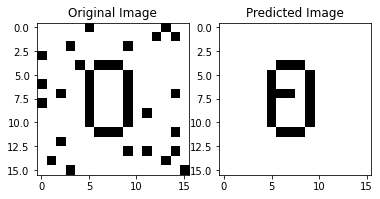

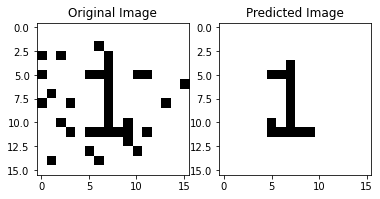

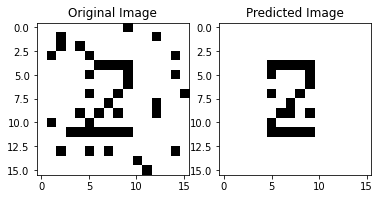

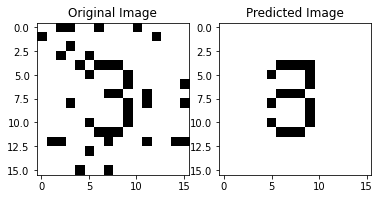

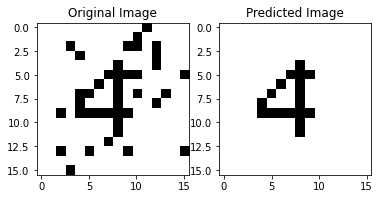

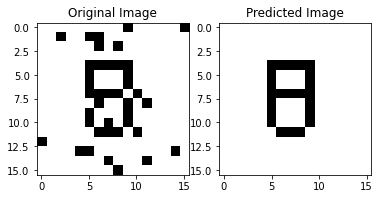

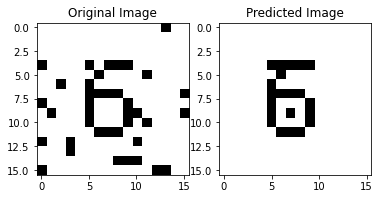

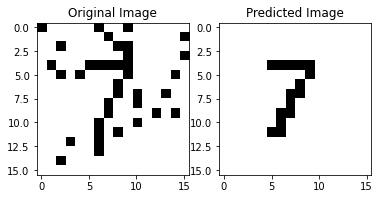

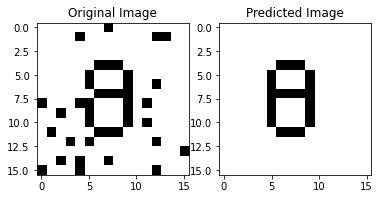

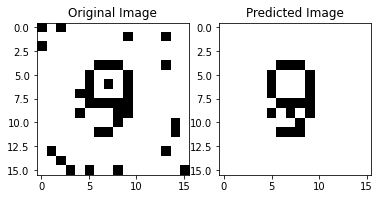

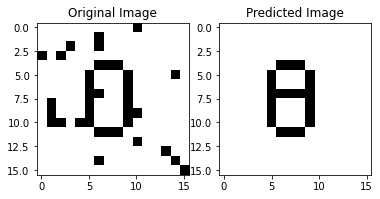

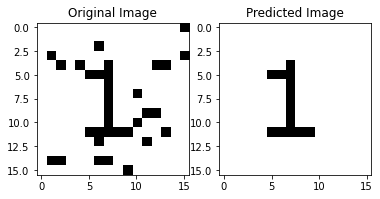

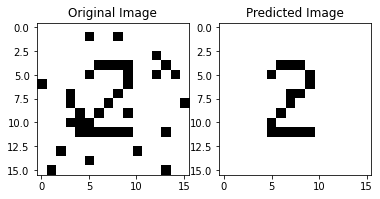

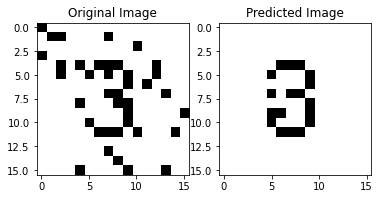

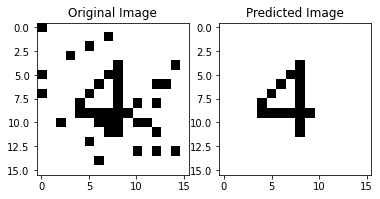

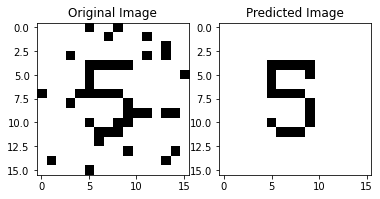

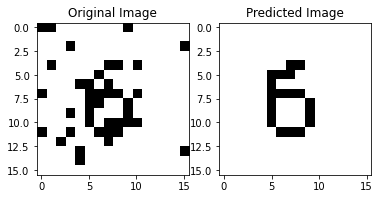

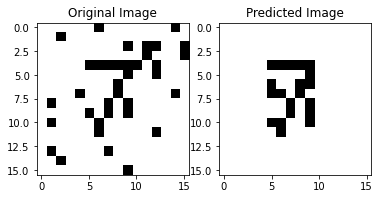

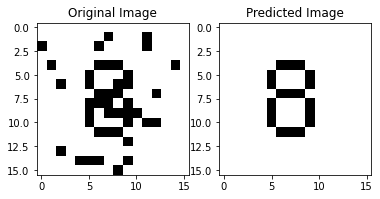

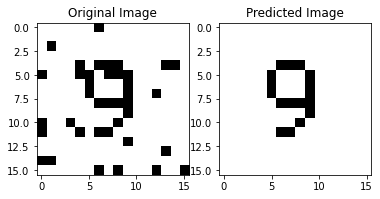

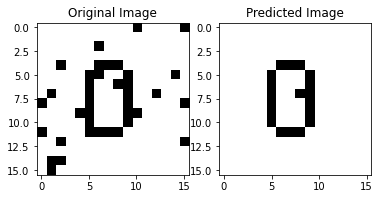

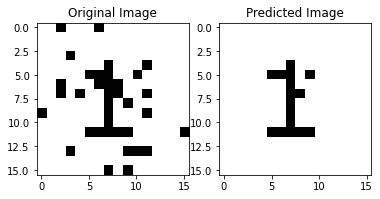

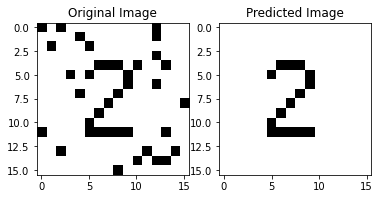

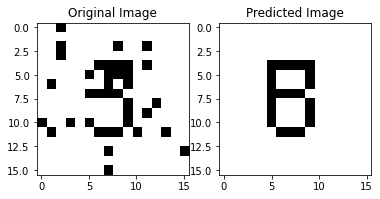

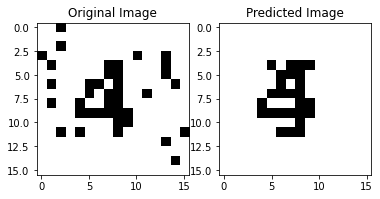

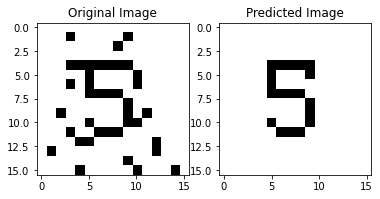

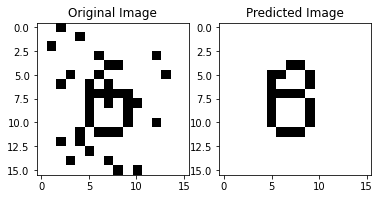

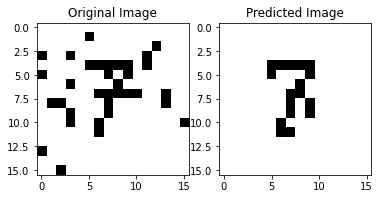

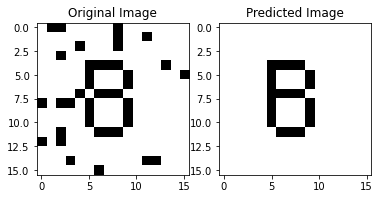

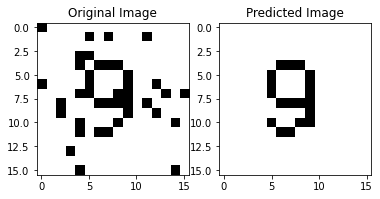

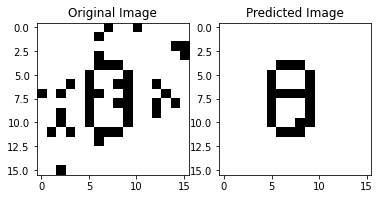

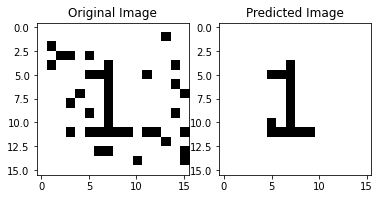

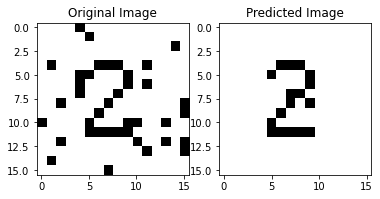

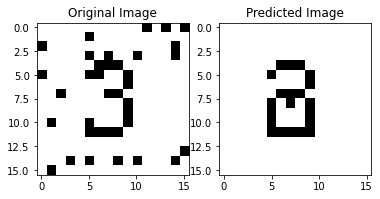

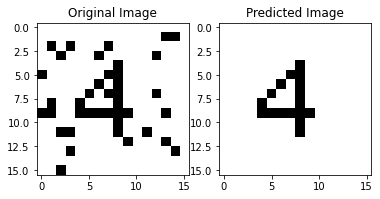

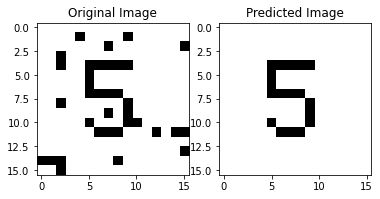

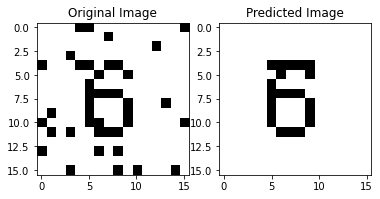

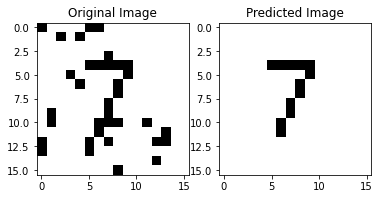

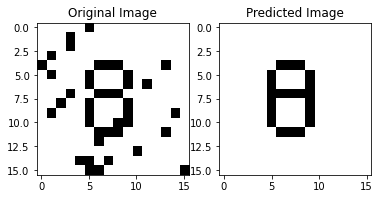

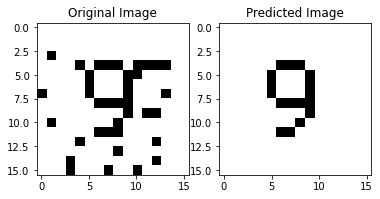

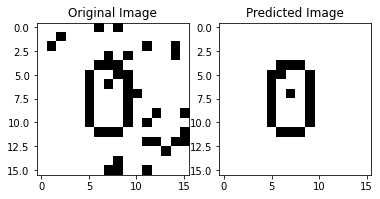

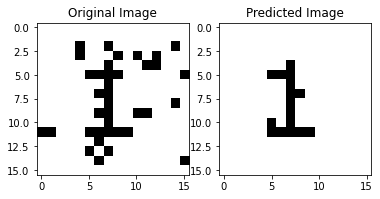

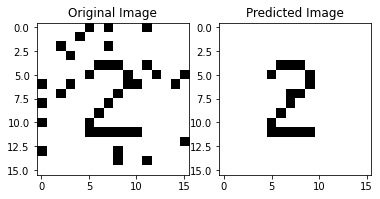

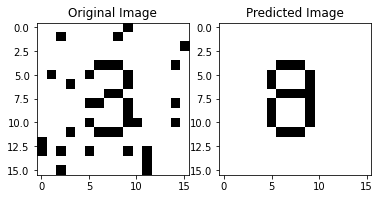

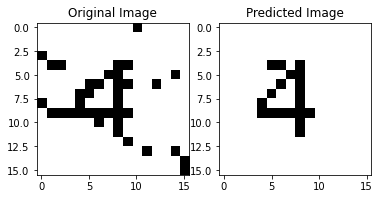

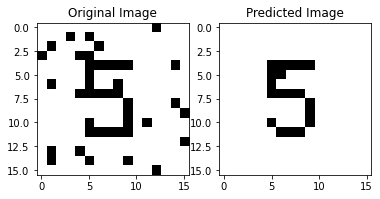

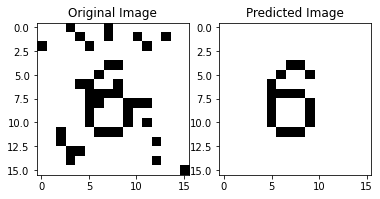

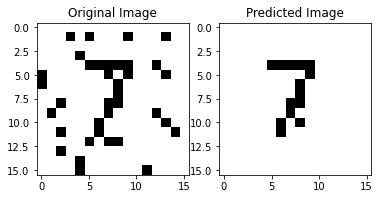

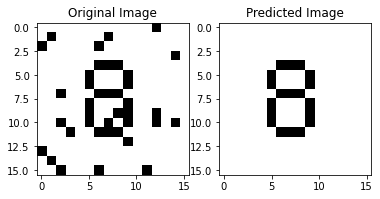

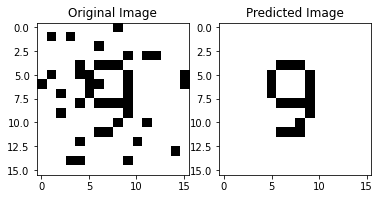

In [12]:
#------- Predicting the noisy images with the model --------------#
noisy_model_prediction_data = {}
print("Predictions for Noisy data with Standard Deviation")
for std in STANDARD_DEVIATIONS:
    noisy_model = imagetensor(f"{NOISY_DATASET}{std}/")
    noisy_model = noisy_model.reshape(model_train.shape[0],1,256)
    noisy_model = convert_array_to_0_and_1(noisy_model)

    noisy_predict = model.predict(noisy_model)
    noisy_predict = convert_array_to_0_and_1(noisy_predict)
    
    noisy_model_prediction_data[std] = noisy_predict
    display(noisy_model,noisy_predict,True)

Calulation and Graph Generation of Fh and Ffa

In [13]:
#------- Function for calculating FFA and FH values --------------#
def calculate_fh_ffa(original_data, predicted_data):
    '''
        original_data: Original Image data
        predicted_data: Predicted Image data
        
    '''

    correctly_predicted_black_pixels_count = 0
    wrongly_predicted_black_pixels_count = 0

    whites_original = np.count_nonzero(original_data==1)
    blacks_original = np.count_nonzero(original_data==0)

    for i in range(16):
        for j in range(16):
            if original_data[i][j] == 0 and predicted_data[i][j] == 0:
                correctly_predicted_black_pixels_count += 1
            elif original_data[i][j] == 1 and predicted_data[i][j] == 0:
                wrongly_predicted_black_pixels_count += 1
                
    fh = correctly_predicted_black_pixels_count/blacks_original
    ffa = wrongly_predicted_black_pixels_count/whites_original
    
    return fh,ffa

In [14]:
#------- Calculating the FFA and FH values for all the Predicted Images for both Trained and Noisy datasets --------------#
all_metrics = {}
metric_original = model_train
metric_predicted = original_data_predict

noisy_model_prediction_data[0] = metric_predicted

metric_original = metric_original.reshape(metric_original.shape[0],16,16)

for k,v in noisy_model_prediction_data.items():

    metric_predicted = metric_predicted.reshape(metric_predicted.shape[0],16,16)

    all_metrics[k] = {}
    
    for i in range(10):
        all_metrics[k][i] = calculate_fh_ffa(metric_original[i],metric_predicted[i])

#------- Displaying all the FFA and FH values for each image of a specific standard deviation --------------#
print(all_metrics)

{0.001: {0: (1.0, 0.0), 1: (1.0, 0.0), 2: (1.0, 0.0), 3: (1.0, 0.012448132780082987), 4: (1.0, 0.0), 5: (1.0, 0.0), 6: (1.0, 0.0), 7: (1.0, 0.0), 8: (1.0, 0.0), 9: (1.0, 0.0)}, 0.002: {0: (1.0, 0.0), 1: (1.0, 0.0), 2: (1.0, 0.0), 3: (1.0, 0.012448132780082987), 4: (1.0, 0.0), 5: (1.0, 0.0), 6: (1.0, 0.0), 7: (1.0, 0.0), 8: (1.0, 0.0), 9: (1.0, 0.0)}, 0.003: {0: (1.0, 0.0), 1: (1.0, 0.0), 2: (1.0, 0.0), 3: (1.0, 0.012448132780082987), 4: (1.0, 0.0), 5: (1.0, 0.0), 6: (1.0, 0.0), 7: (1.0, 0.0), 8: (1.0, 0.0), 9: (1.0, 0.0)}, 0.005: {0: (1.0, 0.0), 1: (1.0, 0.0), 2: (1.0, 0.0), 3: (1.0, 0.012448132780082987), 4: (1.0, 0.0), 5: (1.0, 0.0), 6: (1.0, 0.0), 7: (1.0, 0.0), 8: (1.0, 0.0), 9: (1.0, 0.0)}, 0.01: {0: (1.0, 0.0), 1: (1.0, 0.0), 2: (1.0, 0.0), 3: (1.0, 0.012448132780082987), 4: (1.0, 0.0), 5: (1.0, 0.0), 6: (1.0, 0.0), 7: (1.0, 0.0), 8: (1.0, 0.0), 9: (1.0, 0.0)}, 0.02: {0: (1.0, 0.0), 1: (1.0, 0.0), 2: (1.0, 0.0), 3: (1.0, 0.012448132780082987), 4: (1.0, 0.0), 5: (1.0, 0.0), 6: (1.

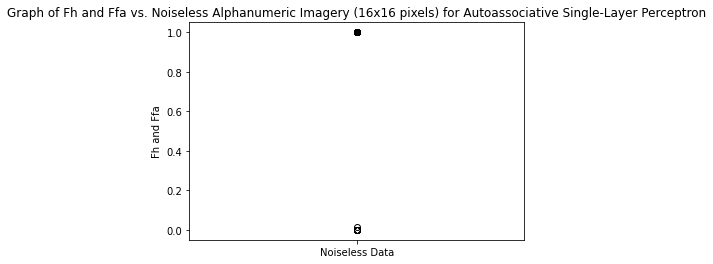

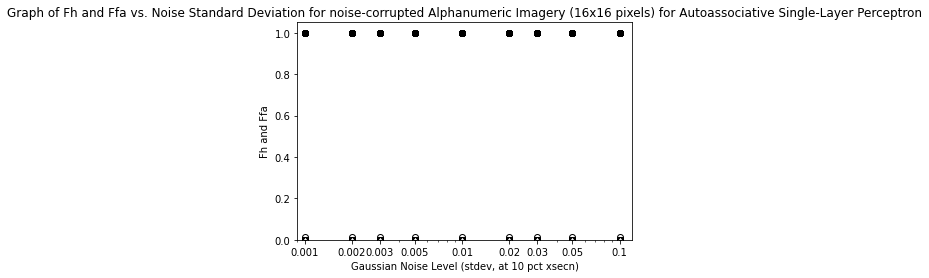

In [15]:
#------- Plotting all the results --------------#
plot_data(all_metrics[0],noiseless=True)

plot_data(all_metrics)

Three-Layer Shallow Multilayer Neural Network (Bonus)

In [16]:
#----- Model Creation fo SMNN --------------#
SMM_model = keras.Sequential([
    keras.layers.Dense(256,activation=tf.nn.sigmoid,input_shape=(1,256),),
    keras.layers.Dense(256,activation=tf.nn.sigmoid),
    keras.layers.Dense(256,activation=tf.nn.sigmoid),
])
SMM_model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss='mean_squared_error')
print('model summary')
SMM_model.summary()
print('Shapes & Bias')
for layer in SMM_model.layers:
    print(layer.name)
    print('Weights shape: ',layer.get_weights()[0].shape)
    print('Bias Shape: ',layer.get_weights()[1].shape)



model summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 256)            65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1, 256)            65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1, 256)            65792     
Total params: 197,376
Trainable params: 197,376
Non-trainable params: 0
_________________________________________________________________
Shapes & Bias
dense_1
Weights shape:  (256, 256)
Bias Shape:  (256,)
dense_2
Weights shape:  (256, 256)
Bias Shape:  (256,)
dense_3
Weights shape:  (256, 256)
Bias Shape:  (256,)


In [17]:
#------- Training the Dataset --------------#
model_trains = imagetensor("C:/Users/venky/OneDrive/Desktop/NN/Nums/Train/")
model_trains=model_trains.reshape(model_trains.shape[0],1,256)
print(model_trains.shape,model_trains.dtype)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/venky/OneDrive/Desktop/NN/Nums/Train/'

In [ ]:
#------- Fitting the training dataset into the model --------------#
SMM_model.fit(model_trains,model_trains,epochs=950)

#------- Prediction of tested data --------------#
SMM_predict=SMM_model.predict(model_trains)

In [ ]:
#------- Displsying Results --------------#
model_trains = np.where(model_trains<np.mean(model_trains),0,1).astype('float64')
SMM_predict = np.where(SMM_predict<np.mean(SMM_predict),0,1).astype('float64')
print(model_trains.shape,SMM_predict.shape)

display(model_trains,SMM_predict)

Predict the Noise Added data over SMM

In [ ]:
#------- Predicting the noisy images with the SMM model --------------#
SMM_noisy_model_prediction_data = {}
print("Predictions for Noisy data with Standard Deviation")
for std in STANDARD_DEVIATIONS:
    SMM_noisy_model = imagetensor(f"{NOISY_DATASET}{std}/")
    SMM_noisy_model = SMM_noisy_model.reshape(model_trains.shape[0],1,256)
    SMM_noisy_model = convert_array_to_0_and_1(SMM_noisy_model)

    SMM_noisy_predict = SMM_model.predict(SMM_noisy_model)
    SMM_noisy_predict = convert_array_to_0_and_1(SMM_noisy_predict)
    
    SMM_noisy_model_prediction_data[std] = SMM_noisy_predict
    display(SMM_noisy_model,SMM_noisy_predict,True)

#------- Calculating the FFA and FH values for all the Predicted Images for both Trained and Noisy datasets --------------#
SMM_all_metrics = {}
SMM_metric_original = model_trains
SMM_metric_predicted = SMM_predict

SMM_noisy_model_prediction_data[0] = SMM_metric_predicted

SMM_metric_original = SMM_metric_original.reshape(SMM_metric_original.shape[0],16,16)

for k,v in SMM_noisy_model_prediction_data.items():

    SMM_metric_predicted = SMM_metric_predicted.reshape(SMM_metric_predicted.shape[0],16,16)

    SMM_all_metrics[k] = {}
    
    for i in range(10):
        SMM_all_metrics[k][i] = calculate_fh_ffa(SMM_metric_original[i],SMM_metric_predicted[i])

#------- Displaying all the FFA and FH values for each image of a specific standard deviation --------------#
print(SMM_all_metrics)


#------- Plotting all the results --------------#
plot_data(SMM_all_metrics, smm=True)

In [ ]:
x= 2437
y = 875
i=True

while(i):
    if x>y:
        x = x-y
    elif x<y:
        y = y-x
    elif x==y:
        print(x)
        print(y)
        i = False
        break
    

1
1
